In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#np.load 사용할때 에러 발생
#ValueError: Object arrays cannot be loaded when allow_pickle=False
!pip uninstall numpy
!pip install --upgrade numpy==1.16.1

Uninstalling numpy-1.18.5:
  Would remove:
    /usr/bin/f2py
    /usr/bin/f2py3
    /usr/bin/f2py3.6
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.6
    /usr/local/lib/python3.6/dist-packages/numpy-1.18.5.dist-info/*
    /usr/local/lib/python3.6/dist-packages/numpy.libs/libgfortran-ed201abd.so.3.0.0
    /usr/local/lib/python3.6/dist-packages/numpy.libs/libopenblasp-r0-34a18dc3.3.7.so
    /usr/local/lib/python3.6/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.18.5
     |████████████████████████████████| 17.3MB 198kB/s 
ERROR: umap-learn 0.4.4 has requirement numpy>=1.17, but you'll have numpy 1.16.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import os, glob, numpy as np
np.__version__

'1.16.1'

In [ ]:
from PIL import Image

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, AvgPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend.tensorflow_backend as K

In [ ]:
file_dir = "/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/train"
categories = ["Pnemonia_Virus_COVID", "Pnemonia_Virus_Unknown", "Pnemonia_Bacteria", "Normal"]

nb_classes = len(categories)

image_w = 224
image_h = 224

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
  #one-hot 돌리기.
  label = [0 for i in range(nb_classes)]
  label[idx] = 1

  image_dir = file_dir + "/" + cat
  files = glob.glob(image_dir+"/*.*")
  #files = files[:1300]
  print(cat)
  print('파일 개수 : ', len(files))

  y.append(label)
  z = np.array(y)
  print('one hot label : ' + str(z[idx]))
  print()

Pnemonia_Virus_COVID
파일 개수 :  275
one hot label : [1 0 0 0]

Pnemonia_Virus_Unknown
파일 개수 :  1345
one hot label : [0 1 0 0]

Pnemonia_Bacteria
파일 개수 :  2535
one hot label : [0 0 1 0]

Normal
파일 개수 :  1342
one hot label : [0 0 0 1]



In [ ]:
#multi_image_data.npy 생성했으면 다시 실행안해도 됨

file_dir = "/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/train"
categories = ["Pnemonia_Virus_COVID", "Pnemonia_Virus_Unknown", "Pnemonia_Bacteria", "Normal"]

nb_classes = len(categories)

image_w = 224
image_h = 224

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = file_dir + "/" + cat
    files = glob.glob(image_dir+"/*.*")
    #files = files[:1300]
    print(cat, " 파일 개수 : ", len(files))

    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        #if i % 700 == 0:
        #    print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/multi_image_data.npy", xy)
#np.save("/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/multi_image_data_1300.npy", xy)

print("ok", len(y))

Pnemonia_Virus_COVID  파일 개수 :  275
Pnemonia_Virus_Unknown  파일 개수 :  1345
Pnemonia_Bacteria  파일 개수 :  2535
Normal  파일 개수 :  1342
ok 5497


In [ ]:
X_train, X_test, y_train, y_test = np.load('/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/multi_image_data.npy')
#X_train, X_test, y_train, y_test = np.load('/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/multi_image_data_1300.npy')
print(X_train.shape)
print(X_train.shape[0])

print(X_test.shape)
print(X_test.shape[0])

(4122, 224, 224, 3)
4122
(1375, 224, 224, 3)
1375


In [ ]:
# normalization
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
##############################################################################################
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))

# model = Sequential()
# model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3,3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
# model.add(Conv2D(250, (3,3), padding="same", activation='relu'))

# model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
# model.add(AvgPool2D(2, 2))
# #model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
# model.add(AvgPool2D(2, 2))
# #model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (2,2), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
    
# model.add(Flatten())
# model.add(Dense(32))
# model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_dir = '/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 86528)            

In [ ]:
#model.fit(입력데이터, 라벨값, 몇개의 샘플로 가중치 갱신, 학습 반복 횟수)
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Train on 4122 samples, validate on 1375 samples
Epoch 1/10
4122/4122 [==============================] - 11s 3ms/step - loss: 1.9602 - accuracy: 0.5784 - val_loss: 0.7140 - val_accuracy: 0.7135
Epoch 2/10
4122/4122 [==============================] - 10s 2ms/step - loss: 0.6865 - accuracy: 0.7280 - val_loss: 0.5644 - val_accuracy: 0.7622
Epoch 3/10
4122/4122 [==============================] - 11s 3ms/step - loss: 0.5807 - accuracy: 0.7705 - val_loss: 0.8062 - val_accuracy: 0.6742
Epoch 4/10
4122/4122 [==============================] - 10s 3ms/step - loss: 0.4944 - accuracy: 0.7940 - val_loss: 0.5102 - val_accuracy: 0.7731
Epoch 5/10
4122/4122 [==============================] - 10s 3ms/step - loss: 0.4553 - accuracy: 0.8125 - val_loss: 0.5125 - val_accuracy: 0.7862
Epoch 6/10
4122/4122 [==============================] - 10s 3ms/step - loss: 0.4194 - accuracy: 0.8246 - val_loss: 0.6551 - val_accuracy: 0.7658
Epoch 7/10
4122/4122 [==============================] - 10s 3ms/step - loss: 0.383

In [ ]:
# 모델 평가하기 
score = model.evaluate(X_test, y_test)
print('loss=', score[0])        # loss
print('accuracy=', score[1])    # acc

1320/1320 [==============================] - 2s 1ms/step
loss= 0.5857977957436533
accuracy= 0.7803030014038086


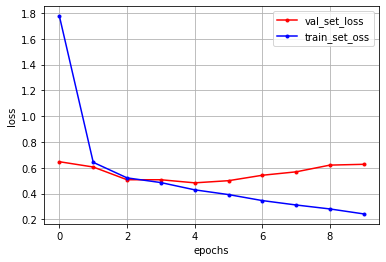

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [ ]:
def calc_acc(sample_cnt):
  file_dir = "/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/test"
  categories = ["Pnemonia_Virus_COVID", "Pnemonia_Virus_Unknown", "Pnemonia_Bacteria", "Normal"]

  image_w = 224
  image_h = 224

  X = []
  filenames = []
  labels = []
  label = 0

  for idx, cat in enumerate(categories):
    image_dir = file_dir + "/" + cat
    files = glob.glob(image_dir+"/*.*")
    files = files[:sample_cnt[idx]]
    #print(cat, " 파일 개수 : ", len(files))

    for i, f in enumerate(files):
      img = Image.open(f)
      img = img.convert("RGB")
      img = img.resize((image_w, image_h))
      data = np.asarray(img)
      filenames.append(f)
      X.append(data)
      labels.append(label)
      #print(f)

    label += 1

  X = np.array(X)

  prediction = model.predict(X)

  #print(prediction)
  pred = prediction.argmax(axis=1)
  # unique, counts = np.unique(pred, return_counts=True)
  # dict_pred = dict(zip(unique, counts))
  # print(prediction.argmax(axis=1))
  # print(dict_pred[3])

  cnt = 0
  length = len(pred)
  for i in range(length):
    if(pred[i] == labels[i]):
      cnt += 1
  
  return cnt/length*100


In [ ]:
sample_cnt = {0:33, 1:148, 2:242, 3:234}
ret = calc_acc(sample_cnt)
print('전체 test 데이터 예측 정확도 : {0}%'.format(ret))

sample_cnt = {0:33, 1:0, 2:0, 3:0}
ret = calc_acc(sample_cnt)
print('COVID-19 데이터 예측 정확도 : {0}%'.format(ret))

전체 test 데이터 예측 정확도 : 65.29680365296804%
COVID-19 데이터 예측 정확도 : 87.87878787878788%
